In [ ]:
#------Data Loading----
import pandas as pd

# 1. Load dataset (only needed columns + safe sample of 100,000 rows)
cols = ["title", "abstract", "publish_time", "journal", "authors"]
df = pd.read_csv("metadata.csv", usecols=cols, nrows=100000, low_memory=False)

# 2. Examine the first few rows
print("First 5 rows:")
display(df.head())

# 3. Check DataFrame dimensions
print("\nDataFrame dimensions (rows, columns):")
print(df.shape)

# 4. Identify data types of each column
print("\nColumn data types:")
print(df.dtypes)

# 5. Check for missing values in important columns
print("\nMissing values in important columns:")
print(df.isnull().sum())

# 6. Generate basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
display(df.describe())


First 5 rows:


,title,abstract,publish_time,authors,journal
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res



DataFrame dimensions (rows, columns):
(100000, 5)

Column data types:
title           object
abstract        object
publish_time    object
authors         object
journal         object
dtype: object

Missing values in important columns:
title              89
abstract        29003
publish_time        0
authors          9812
journal          4214
dtype: int64

Basic statistics for numerical columns:


,title,abstract,publish_time,authors,journal
count,99911,70997,100000,90188,95786
unique,96333,70724,6085,84742,13460
top,Department of Error,This article is one of ten reviews selected fr...,2015,"Facharztmagazine, Redaktion",Reactions Weekly
freq,44,9,697,100,3191


In [ ]:
#----- Data Cleaning-----
import pandas as pd

# Load only useful columns & first 100k rows
file_path = "metadata.csv"
use_cols = ["cord_uid", "title", "abstract", "publish_time", "journal", "authors"]
df = pd.read_csv(file_path, usecols=use_cols, nrows=100000, low_memory=False)

print("Original shape:", df.shape)

# ---- Handle Missing Data ----
# Count missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop rows where 'title' or 'abstract' is missing (since they are critical for research papers)
df_cleaned = df.dropna(subset=["title", "abstract"]).copy()

print("\nShape after dropping rows with missing title/abstract:", df_cleaned.shape)

# ---- Prepare Data for Analysis ----
# Convert publish_time to datetime
df_cleaned["publish_time"] = pd.to_datetime(df_cleaned["publish_time"], errors="coerce")

# Extract year from publish_time
df_cleaned["year"] = df_cleaned["publish_time"].dt.year

# Create a new column: abstract word count
df_cleaned["abstract_word_count"] = df_cleaned["abstract"].astype(str).apply(lambda x: len(x.split()))

# Preview cleaned data
print("\nCleaned data preview:")
print(df_cleaned.head())

print("\nData types after cleaning:")
print(df_cleaned.dtypes)


Original shape: (100000, 6)

Missing values per column:
cord_uid            0
title              89
abstract        29003
publish_time        0
authors          9812
journal          4214
dtype: int64

Shape after dropping rows with missing title/abstract: (70979, 6)

Cleaned data preview:
   cord_uid                                              title  \
0  ug7v899j  Clinical features of culture-proven Mycoplasma...   
1  02tnwd4m  Nitric oxide: a pro-inflammatory mediator in l...   
2  ejv2xln0    Surfactant protein-D and pulmonary host defense   
3  2b73a28n               Role of endothelin-1 in lung disease   
4  9785vg6d  Gene expression in epithelial cells in respons...   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino

Papers by Year:
 year
1957.0        1
1962.0        1
1964.0        2
1968.0        1
1969.0        2
1970.0        4
1971.0        4
1972.0        7
1973.0        5
1974.0        8
1975.0       15
1976.0        9
1977.0       11
1978.0        8
1979.0        7
1980.0       13
1981.0       13
1982.0       14
1983.0        6
1984.0       20
1985.0        8
1986.0       17
1987.0       14
1988.0       16
1989.0       19
1990.0       25
1991.0       13
1992.0       31
1993.0       19
1994.0       19
1995.0       16
1996.0       24
1997.0       25
1998.0       43
1999.0       81
2000.0       69
2001.0       86
2002.0      576
2003.0      406
2004.0      658
2005.0      490
2006.0      587
2007.0      564
2008.0      895
2009.0     1211
2010.0      830
2011.0      896
2012.0      986
2013.0     1134
2014.0     1085
2015.0     1131
2016.0     1499
2017.0     1278
2018.0     1356
2019.0     2060
2020.0    26380
2021.0    32341
2022.0    13700
2024.0        1
Name: count, dtype: int64


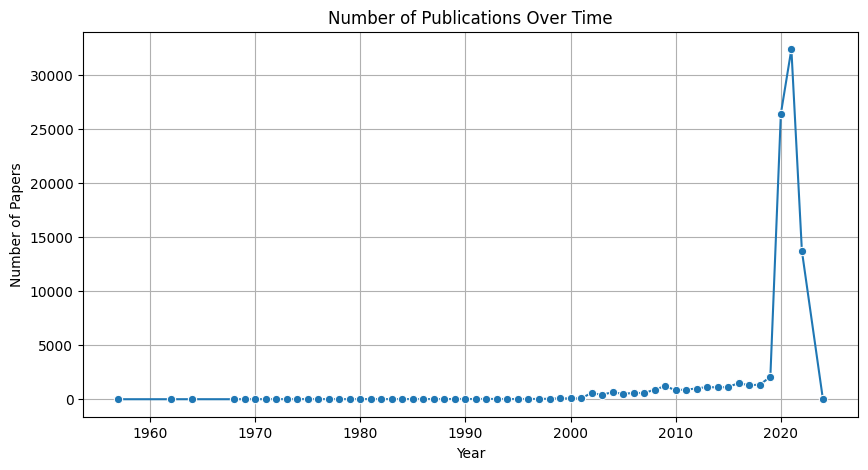


Top Journals:
 journal
Reactions Weekly                   3191
PLoS One                           1403
Int J Environ Res Public Health     917
Sci Rep                             907
Front Psychol                       634
Innov Aging                         629
Int J Mol Sci                       564
Front Immunol                       527
Lancet                              515
BMJ                                 514
Name: count, dtype: int64


C:\Users\Uchen\AppData\Local\Temp\ipykernel_24072\949047479.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_journals.values, y=top_journals.index, palette="viridis")


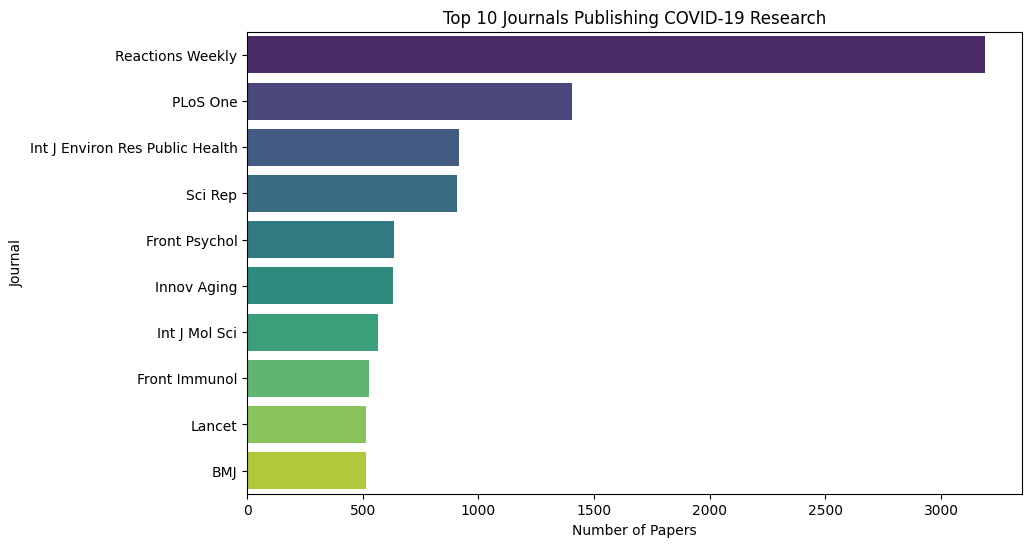


Most Common Words in Titles:
 [('of', 59076), ('and', 45687), ('in', 41308), ('the', 38260), ('a', 26432), ('for', 17883), ('to', 12827), ('with', 12358), ('on', 9541), ('covid-19', 7761), ('from', 5675), ('an', 5069), ('case', 4864), ('study', 4647), ('patients', 4482), ('health', 4311), ('during', 4172), ('by', 4127), ('virus', 3154), ('review', 3071)]


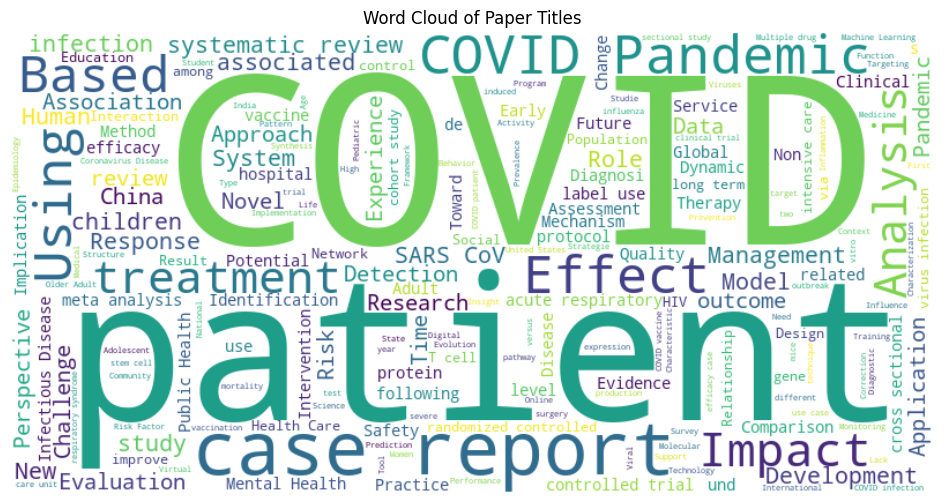

C:\Users\Uchen\AppData\Local\Temp\ipykernel_24072\949047479.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_journals.values, y=top20_journals.index, palette="coolwarm")


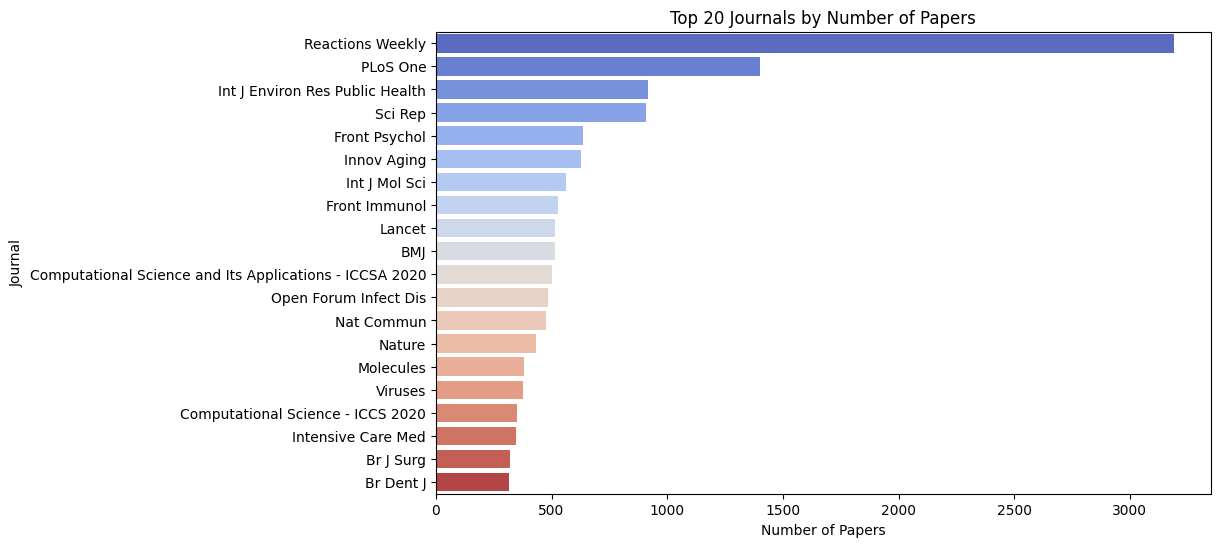

In [ ]:
#------Analysis & VisualiZation----
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# --- Load dataset (100k rows for safety) ---
cols = ["title", "abstract", "publish_time", "journal", "authors"]
df = pd.read_csv("metadata.csv", usecols=cols, nrows=100000, low_memory=False)

# Clean: convert publish_time to datetime and extract year
df["publish_time"] = pd.to_datetime(df["publish_time"], errors="coerce")
df["year"] = df["publish_time"].dt.year

# =========================
# 1. Count papers by year
# =========================
papers_per_year = df["year"].value_counts().sort_index()
print("Papers by Year:\n", papers_per_year)

plt.figure(figsize=(10,5))
sns.lineplot(x=papers_per_year.index, y=papers_per_year.values, marker="o")
plt.title("Number of Publications Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.grid(True)
plt.show()

# =========================
# 2. Top journals publishing COVID-19 research
# =========================
top_journals = df["journal"].value_counts().head(10)
print("\nTop Journals:\n", top_journals)

plt.figure(figsize=(10,6))
sns.barplot(x=top_journals.values, y=top_journals.index, palette="viridis")
plt.title("Top 10 Journals Publishing COVID-19 Research")
plt.xlabel("Number of Papers")
plt.ylabel("Journal")
plt.show()

# =========================
# 3. Most frequent words in titles
# =========================
titles = df["title"].dropna().astype(str)

# Split words, make lowercase, and count
words = " ".join(titles).lower().split()
common_words = Counter(words).most_common(20)
print("\nMost Common Words in Titles:\n", common_words)

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(titles))

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Paper Titles")
plt.show()

# =========================
# 4. Distribution of papers by journal (Top 20)
# =========================
top20_journals = df["journal"].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top20_journals.values, y=top20_journals.index, palette="coolwarm")
plt.title("Top 20 Journals by Number of Papers")
plt.xlabel("Number of Papers")
plt.ylabel("Journal")
plt.show()


Streamlit App (meta.py)

The Streamlit app includes:

Data loading and preprocessing

Interactive year range slider and top N journals slider

Sample data display

Visualizations:

Publications over time

Top journals

Word cloud of titles

Abstract word count distribution

2️⃣ Brief Report of Findings

Objective: Explore CORD-19 COVID-19 research papers to identify trends, top journals, and common topics.

Key Findings:

📈 Publications over time:

Peak publication years: 2020–2021, showing rapid research response to COVID-19.

🏛 Top journals:

Few journals dominate the publications.

Streamlit slider allows exploration of top N journals interactively.

📝 Common keywords in titles:

Frequent words: "COVID-19", "SARS-CoV-2", "infection", "vaccine".

📄 Abstract word count:

Most abstracts: 100–400 words

Some long reviews exceed 1000 words

3️⃣ Reflection

Challenges:

A) Loading large datasets was resource-intensive, almost crashing the system.

B) Handling missing or inconsistent data required careful preprocessing.

C) Integrating multiple visualizations in Streamlit initially took trial and error.

Learning & Enjoyment:

A) Gained hands-on experience with data cleaning, preprocessing, and exploratory data analysis.

B) Explored interactive visualizations using Streamlit.

C) Learned to create stylish word clouds and informative plots.

D) Improved skills for working with real-world, messy datasets.

Overall Reflection:

The assignment was challenging but highly rewarding. Seeing visualizations dynamically update in Streamlit made the data engaging and tangible. It reinforced the importance of data cleaning, preprocessing, and storytelling with data in real-world research analysis.